In [727]:
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where
from sklearn.metrics import classification_report
#data frame with all push values for 
data=pd.read_csv('PushEvent-Data.csv')
df=data[['counts']]
model = OneClassSVM(kernel = 'rbf',nu=0.0008).fit(df)


In [728]:
y_pred = model.predict(df)
print(y_pred)


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1]


In [729]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = df.iloc[outlier_index]
print(outlier_values)


      counts
38  34165168
39  38126512
40  37927355
41  33547000
42  35189870
43  33651830
44  38796946
45  43767191
47  39798578


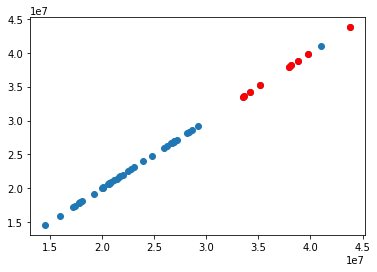

In [730]:
# visualize outputs
plt.scatter(data["counts"], df["counts"])
plt.scatter(outlier_values["counts"],outlier_values["counts"], c = "r")

In [731]:
print(outlier_values)
outliers=data.iloc[[38,39,40,41,42,43,44,45,47]]

      counts
38  34165168
39  38126512
40  37927355
41  33547000
42  35189870
43  33651830
44  38796946
45  43767191
47  39798578


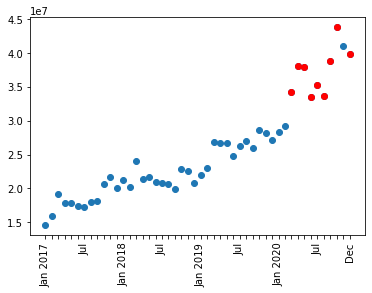

In [721]:
plt.scatter(data["MonthYear"],data["counts"])
my_xticks=['Jan 2017','','','','','','Jul','','','','','','Jan 2018','','','','','','Jul','','','','','','Jan 2019','','','','','','Jul','','','','','','Jan 2020','','','','','','Jul','','','','','Dec']
plt.xticks(data["MonthYear"],my_xticks,rotation=90)
plt.scatter(outliers["MonthYear"],outliers["counts"],color="r")

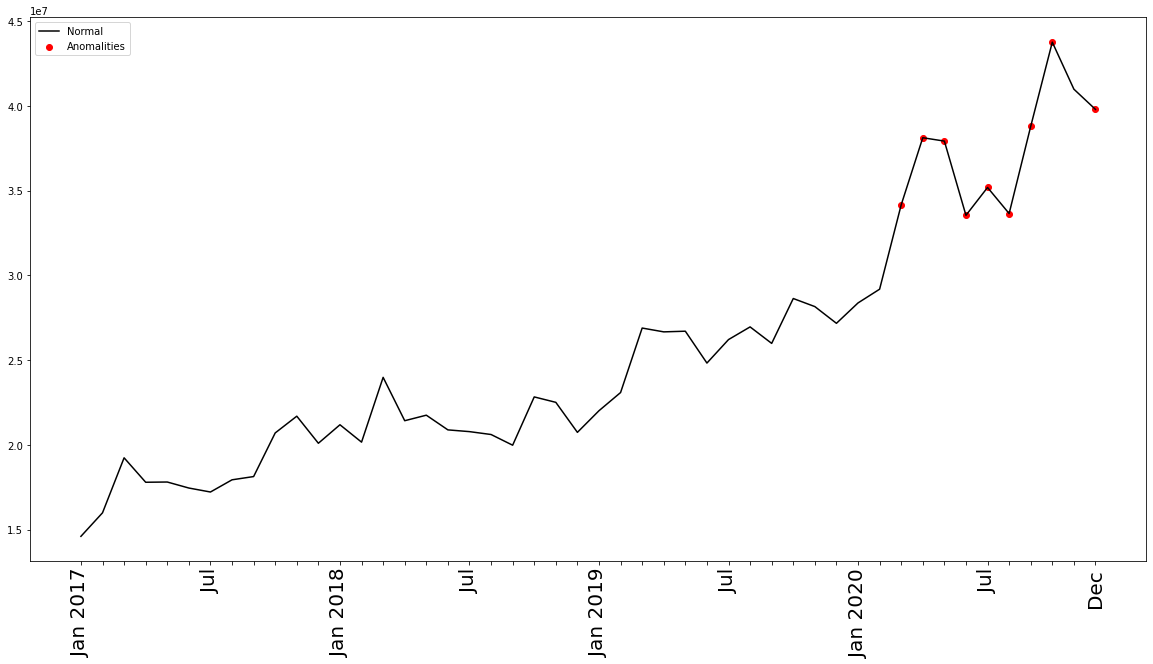

In [732]:
import pandas as pd
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(data['MonthYear'],data['counts'],color='black',label='Normal')
plt.xticks(data['MonthYear'], my_xticks,fontsize=20,rotation=90)
plt.scatter(outliers["MonthYear"],outliers["counts"],c='r',label='Anomalities')
plt.legend()
